# FINTECH Quant Trading Lecture01

In [1]:
import os
import sys
import warnings
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
plt.style.use( "seaborn" )
matplotlib.rcParams[ 'font.family' ] = 'serif'
path = os.path.dirname(os.getcwd())
sys.path.append(path)
fig_folder = "QT_Lecture_01"

# ------ 存放数据的文件夹 ------ #
lecturedata_path = os.path.join(path, 'resources', 'lecturedata')
homeworkdata_path = os.path.join(path, 'resources', 'homeworkdata')
if not os.path.exists(lecturedata_path):
    os.mkdir(lecturedata_path)
else:
    pass
if not os.path.exists(homeworkdata_path):
    os.mkdir(homeworkdata_path)
else:
    pass

from common.filesio import FilesIO
from common.figsio import FiguresIO

In [3]:
onefile = pd.read_csv(
    FilesIO.getLectureData("stockdata/daily/TRD_Dalyr_01.csv"), 
    parse_dates = [1], index_col = None
)

In [4]:
def parse_input(row_data: pd.DataFrame) -> pd.DataFrame:

    """
    解析股票数据
    """
    
    data = row_data[[
        'Stkcd', 'Trddt', 'Opnprc','Hiprc','Loprc', 
        'Clsprc', 'Dretwd', 'Dnshrtrd', 'Dnvaltrd'
    ]]
    data["Stkcd"] = data["Stkcd"].map(lambda x: '{:06d}'.format(x))
    data.rename(
        columns = {
            'Stkcd':'Code', 'Trddt':'Date', 'Opnprc':'Open',
            'Hiprc':'High', 'Loprc':'Low',
            'Clsprc':'Close', 'Dretwd':'Ret', 
            'Dnshrtrd':'Vol', 'Dnvaltrd':'Amount'
        }, inplace = True 
    )
    data.set_index(['Code', 'Date'], inplace = True)
    data = data.unstack(level = 0)
    data = data.swaplevel(0 , 1, axis = 1)
    data.sort_index( axis = 1, inplace = True )
    return data

parse_input(onefile).head()

Code              000001                                                    \
                  Amount  Close   High    Low   Open       Ret         Vol   
Date                                                                         
2000-01-04  1.473254e+08  18.29  18.55  17.20  17.50  0.048138   8216086.0   
2000-01-05  1.734752e+08  18.06  18.85  18.00  18.35 -0.012575   9399315.0   
2000-01-06  2.211925e+08  18.78  19.05  17.75  18.02  0.039867  12022209.0   
2000-01-07  4.435924e+08  19.54  19.77  18.90  19.00  0.040469  22934633.0   
2000-01-10  3.722945e+08  20.14  20.48  19.77  19.79  0.030706  18521078.0   

Code              000002                ... 600398         600399             \
                  Amount  Close   High  ...   Open Ret Vol Amount Close High   
Date                                    ...                                    
2000-01-04  4.605345e+07  10.30  10.40  ...    NaN NaN NaN    NaN   NaN  NaN   
2000-01-05  4.734800e+07  10.04  10.45  ...    NaN NaN NaN    NaN   NaN  NaN   
2000-01-06  7.424435e+07  10.51  10.60  ...    NaN NaN NaN    NaN   NaN  NaN   
2000-01-07  1.475057e+08  10.99  11.00  ...    NaN NaN NaN    NaN   NaN  NaN   
2000-01-10  1.592591e+08  11.44  11.44  ...    NaN NaN NaN    NaN   NaN  NaN   

Code                         
           Low Open Ret Vol  
Date                         
2000-01-04 NaN  NaN NaN NaN  
2000-01-05 NaN  NaN NaN NaN  
2000-01-06 NaN  NaN NaN NaN  
2000-01-07 NaN  NaN NaN NaN  
2000-01-10 NaN  NaN NaN NaN  

[5 rows x 6650 columns]

In [5]:
import os
import pandas as pd

res_file = []
for file_name in os.listdir(path=FilesIO.getLectureData("stockdata/daily")):
    if file_name.endswith(".csv"):
        print(
            '"%s"' % (
                FilesIO.getLectureData("stockdata/daily/") + file_name
            ).replace("\\", "/")
        )
        df = pd.read_csv(
            FilesIO.getLectureData("stockdata/daily/") + file_name,
            parse_dates=[1], index_col=None
        )
        res_file.append(df)

resfile = parse_input(pd.concat(res_file))

"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr1_01.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr1_02.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr1_03.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr1_04.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr2_03.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr2_04.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr3_04.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr_01.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr_02.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr_03.csv"
"d:/GitsProject/FintechStudy/resources/lecturedata/stockdata/daily/TRD_Dalyr_04.csv"


In [6]:
resfile

Code              000001                                                     \
                  Amount  Close   High    Low   Open       Ret          Vol   
Date                                                                          
2000-01-04  1.473254e+08  18.29  18.55  17.20  17.50  0.048138    8216086.0   
2000-01-05  1.734752e+08  18.06  18.85  18.00  18.35 -0.012575    9399315.0   
2000-01-06  2.211925e+08  18.78  19.05  17.75  18.02  0.039867   12022209.0   
2000-01-07  4.435924e+08  19.54  19.77  18.90  19.00  0.040469   22934633.0   
2000-01-10  3.722945e+08  20.14  20.48  19.77  19.79  0.030706   18521078.0   
...                  ...    ...    ...    ...    ...       ...          ...   
2019-12-25  6.796646e+08  16.30  16.56  16.24  16.45 -0.006098   41491798.0   
2019-12-26  6.103818e+08  16.47  16.48  16.32  16.34  0.010429   37203386.0   
2019-12-27  1.741473e+09  16.63  16.93  16.43  16.53  0.009715  104257472.0   
2019-12-30  1.603153e+09  16.57  16.63  16.10  16.46 -0.003608   97697031.0   
2019-12-31  1.154704e+09  16.45  16.63  16.31  16.57 -0.007242   70444225.0   

Code              000002                ... 900956                       \
                  Amount  Close   High  ...   Open       Ret        Vol   
Date                                    ...                               
2000-01-04  4.605345e+07  10.30  10.40  ...  0.190  0.000000    58000.0   
2000-01-05  4.734800e+07  10.04  10.45  ...  0.190  0.010526   468000.0   
2000-01-06  7.424435e+07  10.51  10.60  ...  0.190  0.010417   548000.0   
2000-01-07  1.475057e+08  10.99  11.00  ...  0.198  0.072165  1160000.0   
2000-01-10  1.592591e+08  11.44  11.44  ...  0.212 -0.009615   329000.0   
...                  ...    ...    ...  ...    ...       ...        ...   
2019-12-25  2.082008e+09  30.29  30.63  ...  1.400 -0.002147   110400.0   
2019-12-26  2.758745e+09  31.12  31.30  ...  1.396 -0.003587    97201.0   
2019-12-27  2.185107e+09  31.00  31.32  ...  1.388 -0.028078   675800.0   
2019-12-30  2.870248e+09  31.57  31.79  ...  1.350  0.000741   260201.0   
2019-12-31  2.122967e+09  32.18  32.45  ...  1.331 -0.014064   333450.0   

Code          900957                                                  
              Amount  Close   High    Low   Open       Ret       Vol  
Date                                                                  
2000-01-04       NaN    NaN    NaN    NaN    NaN       NaN       NaN  
2000-01-05       NaN    NaN    NaN    NaN    NaN       NaN       NaN  
2000-01-06       NaN    NaN    NaN    NaN    NaN       NaN       NaN  
2000-01-07       NaN    NaN    NaN    NaN    NaN       NaN       NaN  
2000-01-10       NaN    NaN    NaN    NaN    NaN       NaN       NaN  
...              ...    ...    ...    ...    ...       ...       ...  
2019-12-25   44252.0  0.570  0.577  0.570  0.575 -0.008696   77100.0  
2019-12-26   41309.0  0.574  0.575  0.564  0.575  0.007018   72700.0  
2019-12-27   50954.0  0.569  0.577  0.569  0.572 -0.008711   88800.0  
2019-12-30  114723.0  0.563  0.573  0.558  0.573 -0.010545  203900.0  
2019-12-31   86535.0  0.556  0.565  0.550  0.565 -0.012433  156008.0  

[4846 rows x 27909 columns]

save figure Prices...


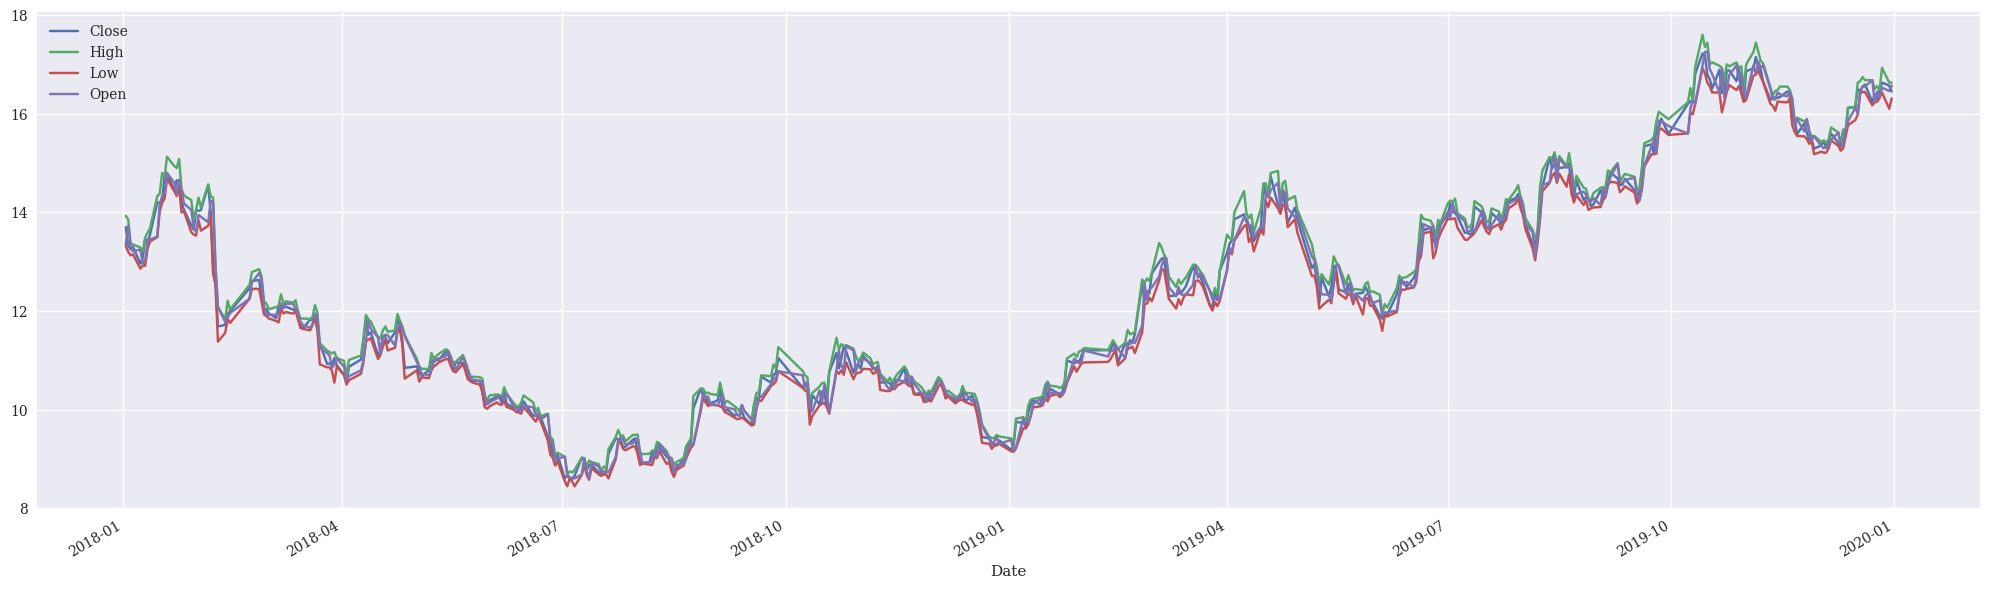

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
data_000001 = resfile["000001"]
data_000001[["Close", "High", "Low", "Open"]]["2018":].plot(ax=ax)
FiguresIO.saveFigures("Prices", fig_folder)
plt.show()

save figure MA_20...


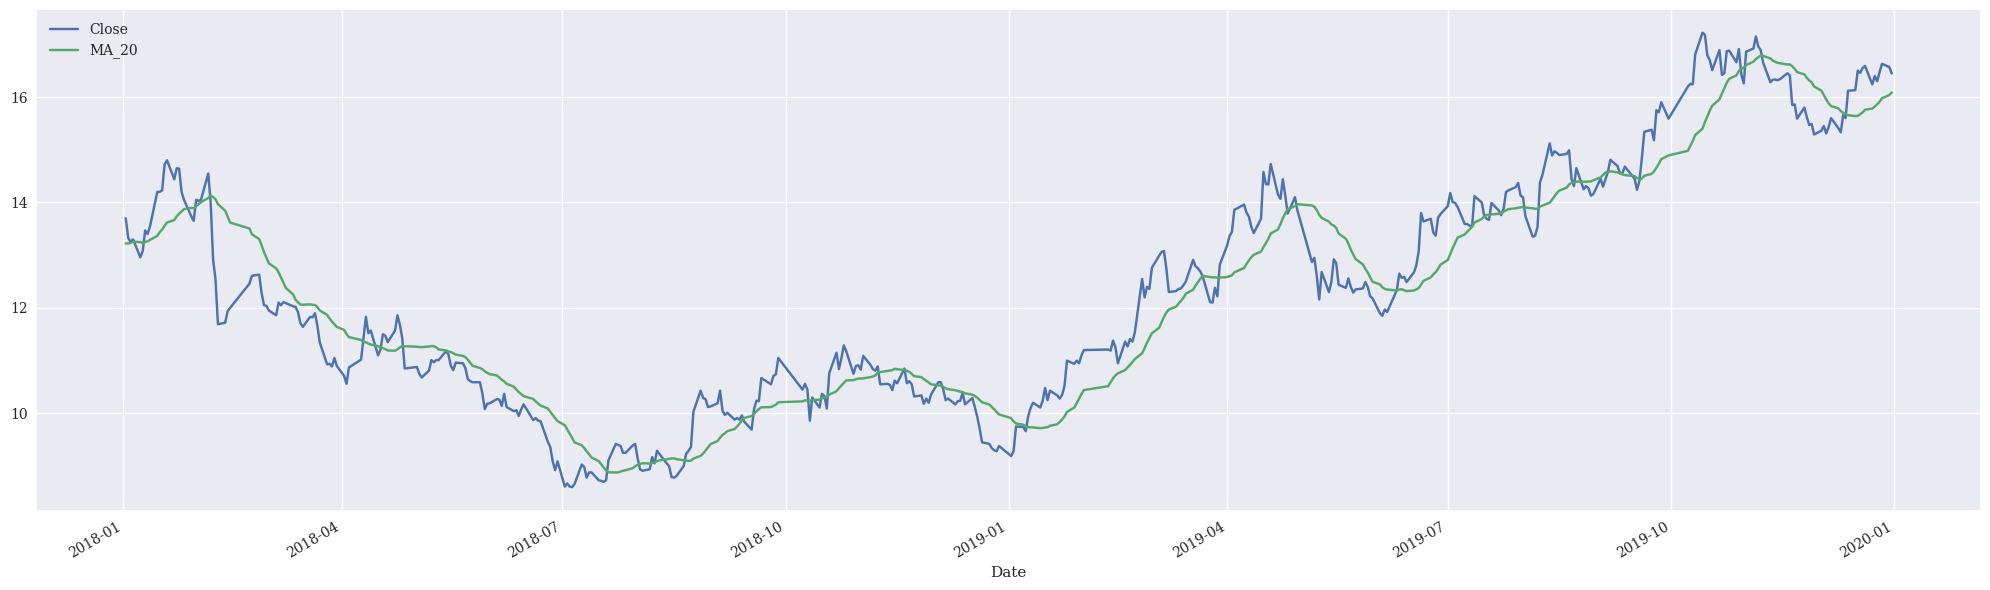

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
data_000001["MA_20"] = data_000001["Close"].rolling(20).mean()
data_000001[["Close", "MA_20"]]["2018":].plot(ax=ax)
FiguresIO.saveFigures("MA_20", fig_folder)
plt.show()

# A simple trading strategy

Buy one share once the price is greater than MA_20, sell it once the price becomes smaller than MA_20.

In [9]:
def getposition(df: pd.DataFrame) -> pd.Series:

    """
    生成一个全为0的Series
    将其中df的20移动平均小于收盘价的位置改为1
    """

    res = pd.Series( 0, index = df.index )
    res.loc[df["MA_20"] < df["Close"]] = 1 
    res = res.shift()
    return res

save figure position...


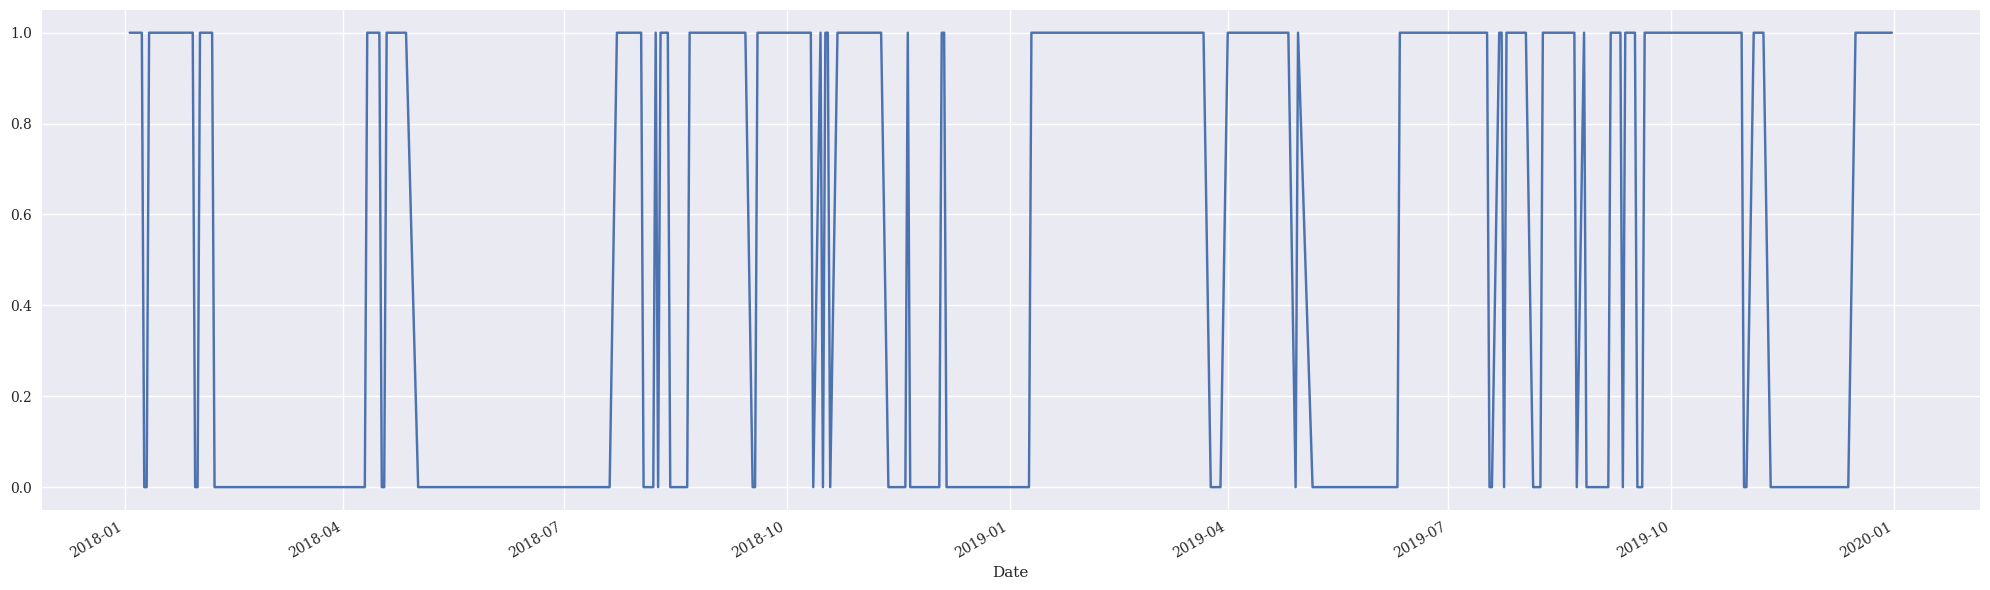

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
position = getposition(data_000001[["Close", "MA_20"]]["2018":])
position.plot(ax=ax)
FiguresIO.saveFigures("position", fig_folder)
plt.show()

In [11]:
def getpnl(position: pd.Series, df: pd.DataFrame) -> pd.Series:

    """
    计算累计收益?
    """

    ret = df["Close"].pct_change()
    pnl = (ret * position + 1).cumprod()
    return pnl

save figure pnl...


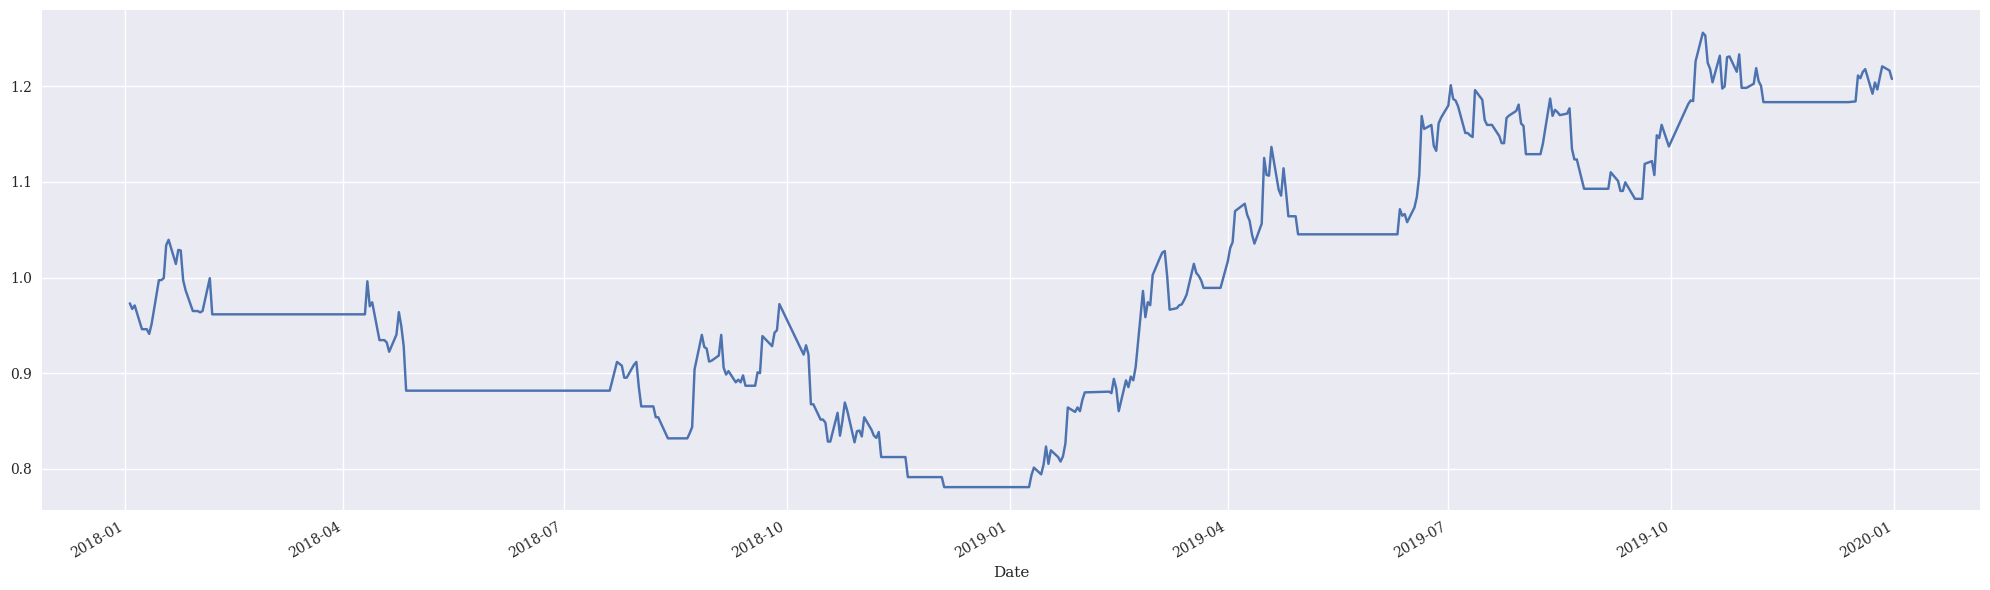

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
pnl = getpnl(position, data_000001[["Close", "MA_20"]]["2018":])
pnl.plot(ax=ax)
FiguresIO.saveFigures("pnl", fig_folder)
plt.show()

# Sharpe Ratio

In [13]:
# 夏普比
import numpy as np
pnl.pct_change().mean() / pnl.pct_change().std() * (np.sqrt(264))

0.6019389785043421

# Turnover Number

In [14]:
(position.diff() > 0).sum()

27

# Maximum Drawdown (MDD)

save figure Maximum Drawdown...


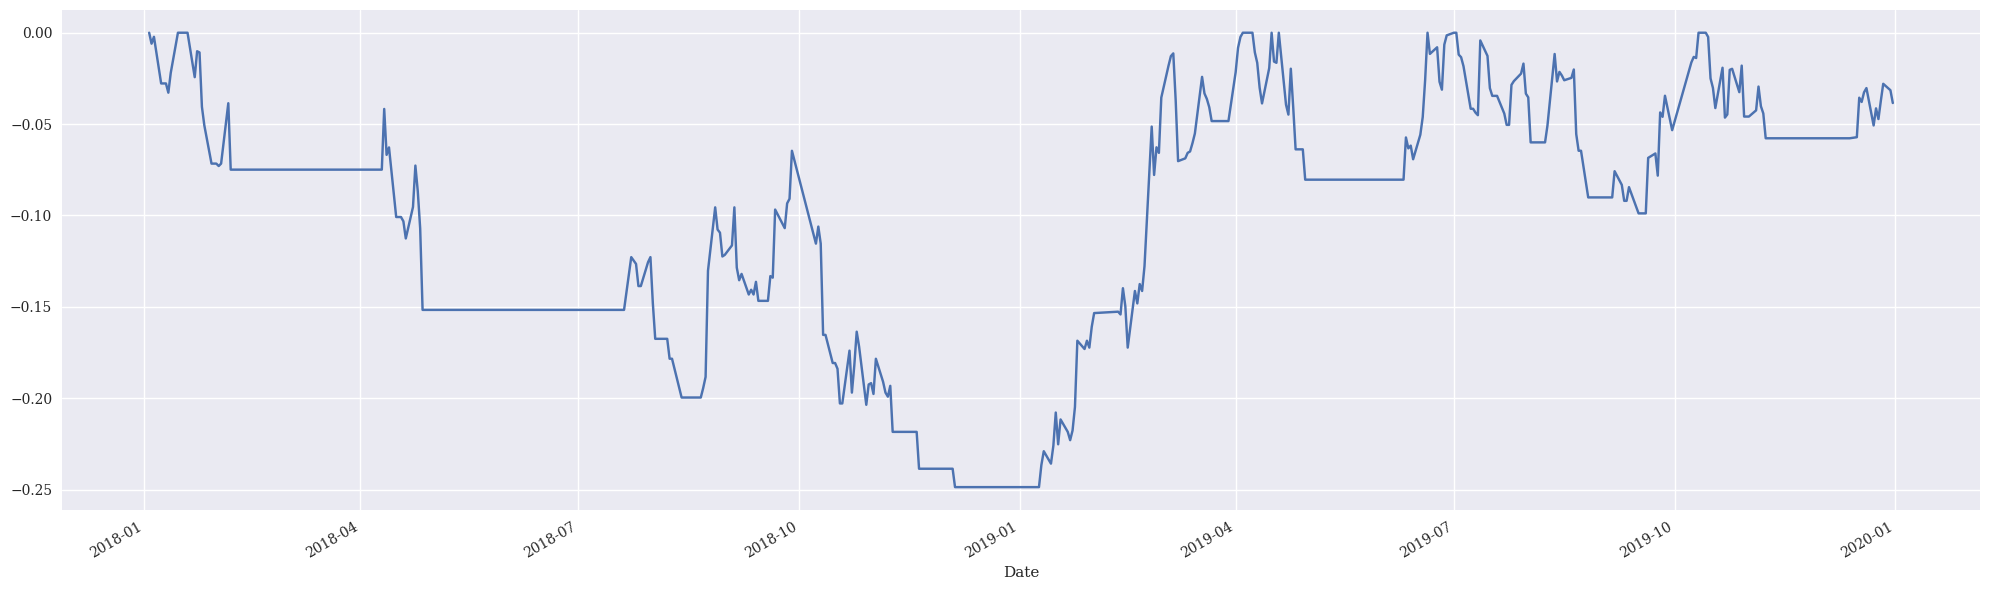

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
rollmax = pnl.rolling(len(pnl), min_periods=1).max()
drawdown = (pnl - rollmax) / rollmax
drawdown.plot(ax=ax)
FiguresIO.saveFigures("Maximum Drawdown", fig_folder)
plt.show()

# In class exercise

Test this trading strategy from 2000 to 2019.

save figure position_2000_2019...


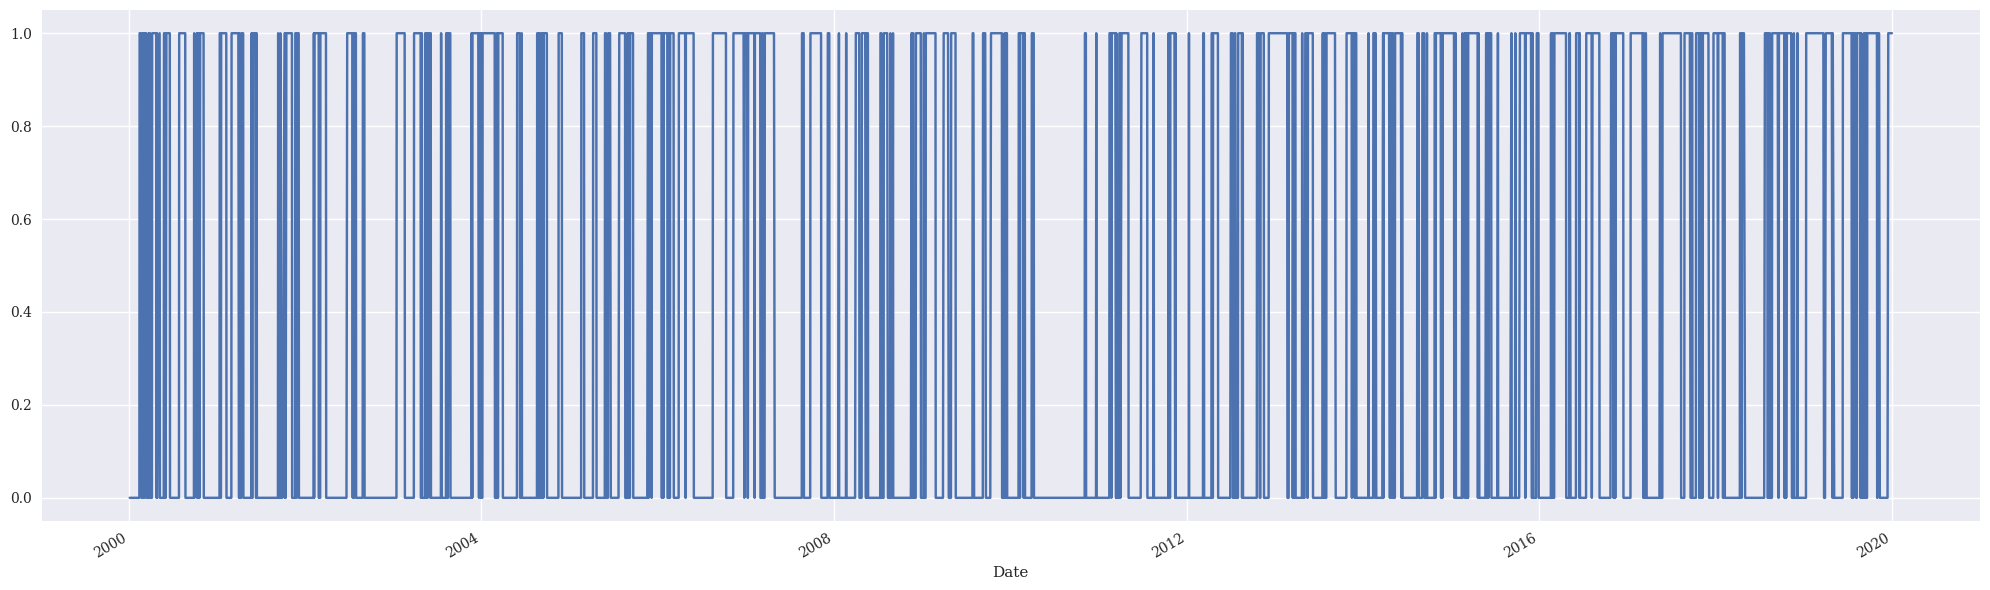

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
position_2000_2019 = getposition(data_000001[["Close", "MA_20"]])
position_2000_2019.plot(ax=ax)
FiguresIO.saveFigures("position_2000_2019", fig_folder)
plt.show()

save figure pnl_2000_2019...


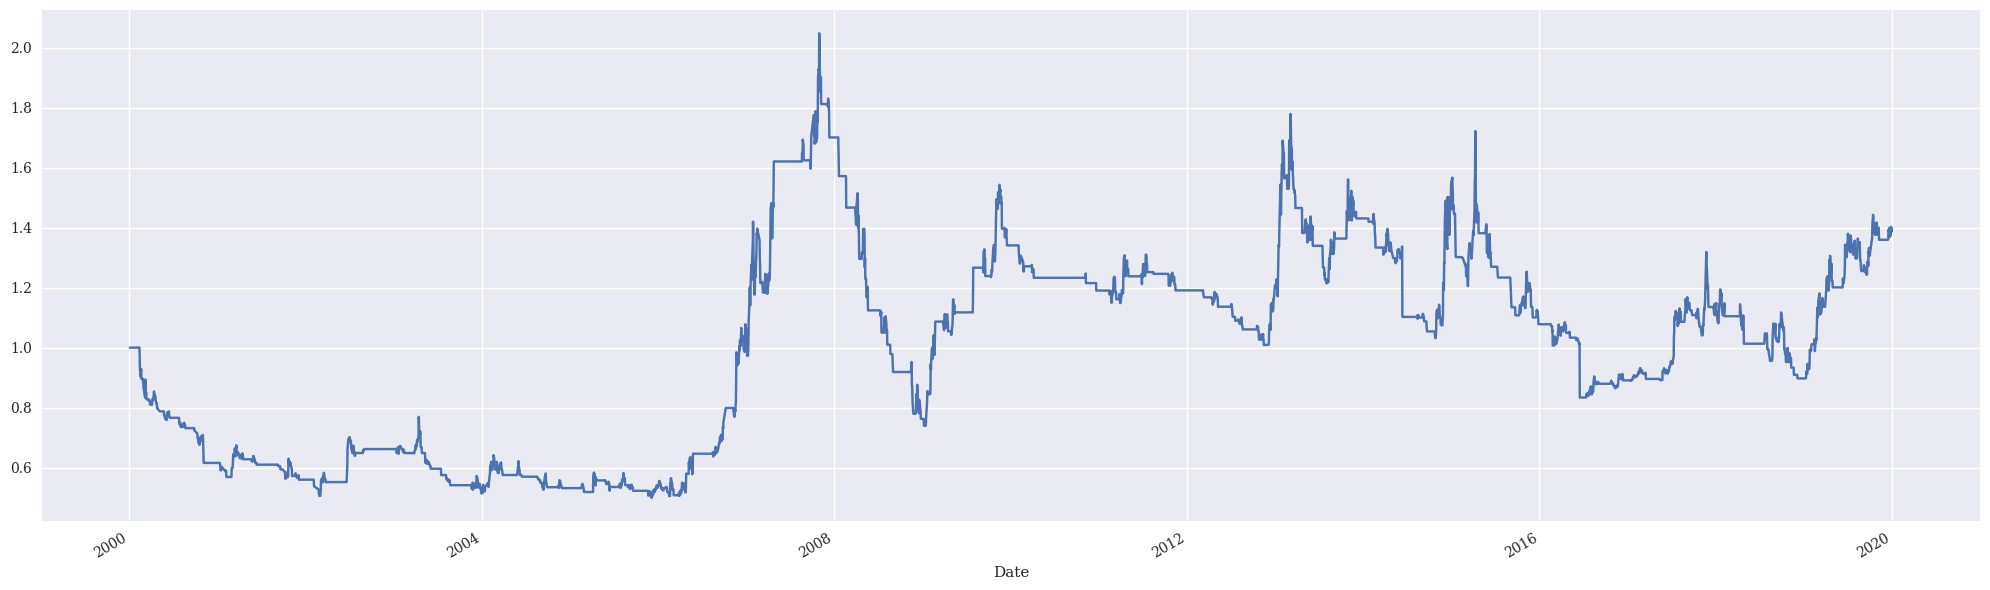

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
pnl_2000_2019 = getpnl(position_2000_2019, data_000001[["Close", "MA_20"]])
pnl_2000_2019.plot(ax=ax)
FiguresIO.saveFigures("pnl_2000_2019", fig_folder)
plt.show()

# In class exercise

Implement a trading strategy:

Position: Closing price greater than 5-day moving average and 20-day moving average.

save figure MA_20 and MA_5...


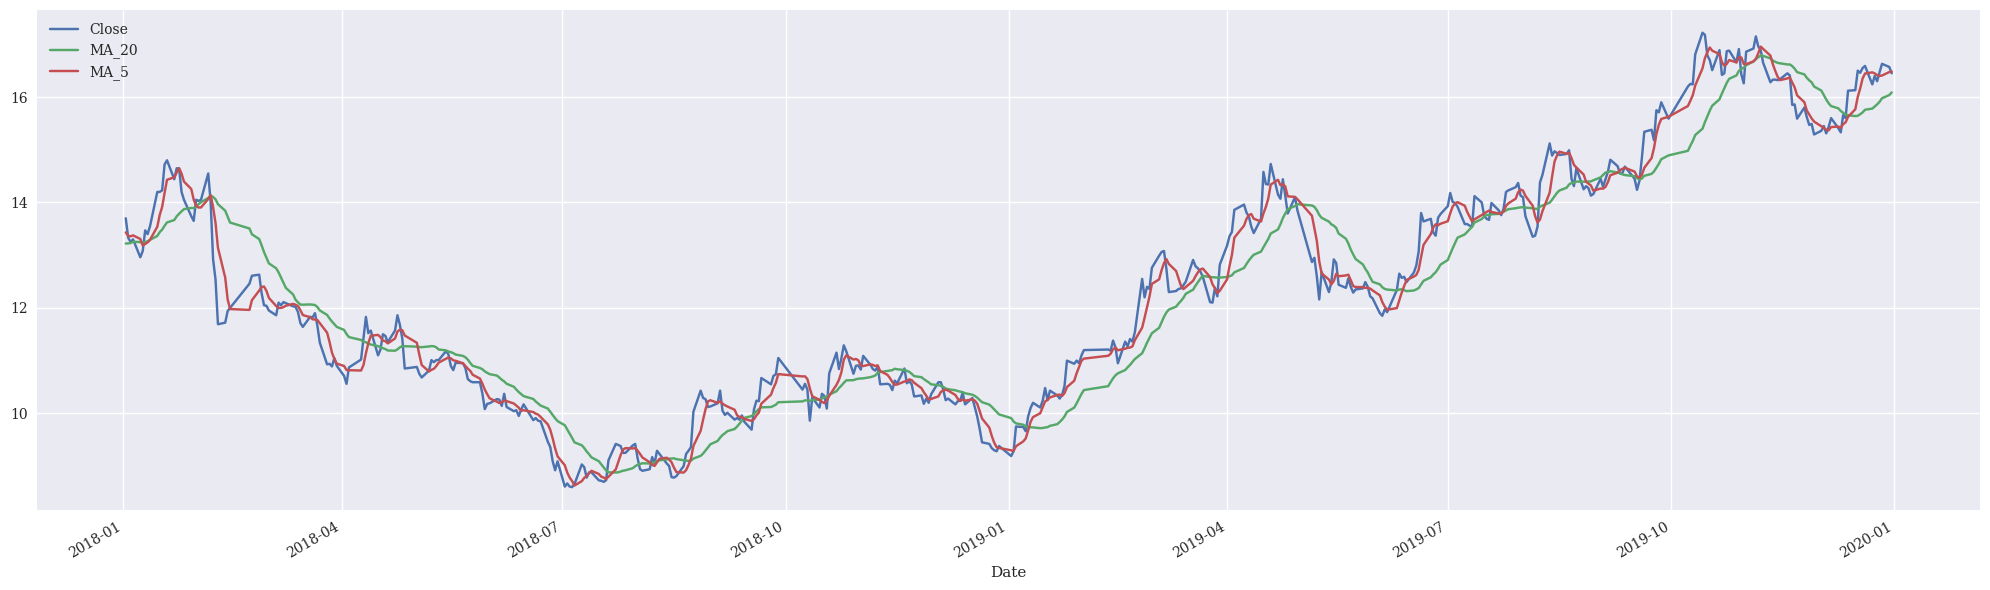

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
data_000001["MA_20"] = data_000001["Close"].rolling(20).mean()
data_000001["MA_5"] = data_000001["Close"].rolling(5).mean()
data_000001[["Close", "MA_20", "MA_5"]]["2018":].plot(ax=ax)
FiguresIO.saveFigures("MA_20 and MA_5", fig_folder)
plt.show()

In [19]:
def getposition2(df: pd.DataFrame) -> pd.Series:

    """
    生成一个全为0的Series
    将其中df的20移动平均和5移动平均小于收盘价的位置改为1
    """

    res = pd.Series( 0, index = df.index )
    res.loc[(df["MA_20"] < df["Close"]) & (df["MA_5"] < df["Close"])] = 1 
    res = res.shift()
    return res

save figure position2...


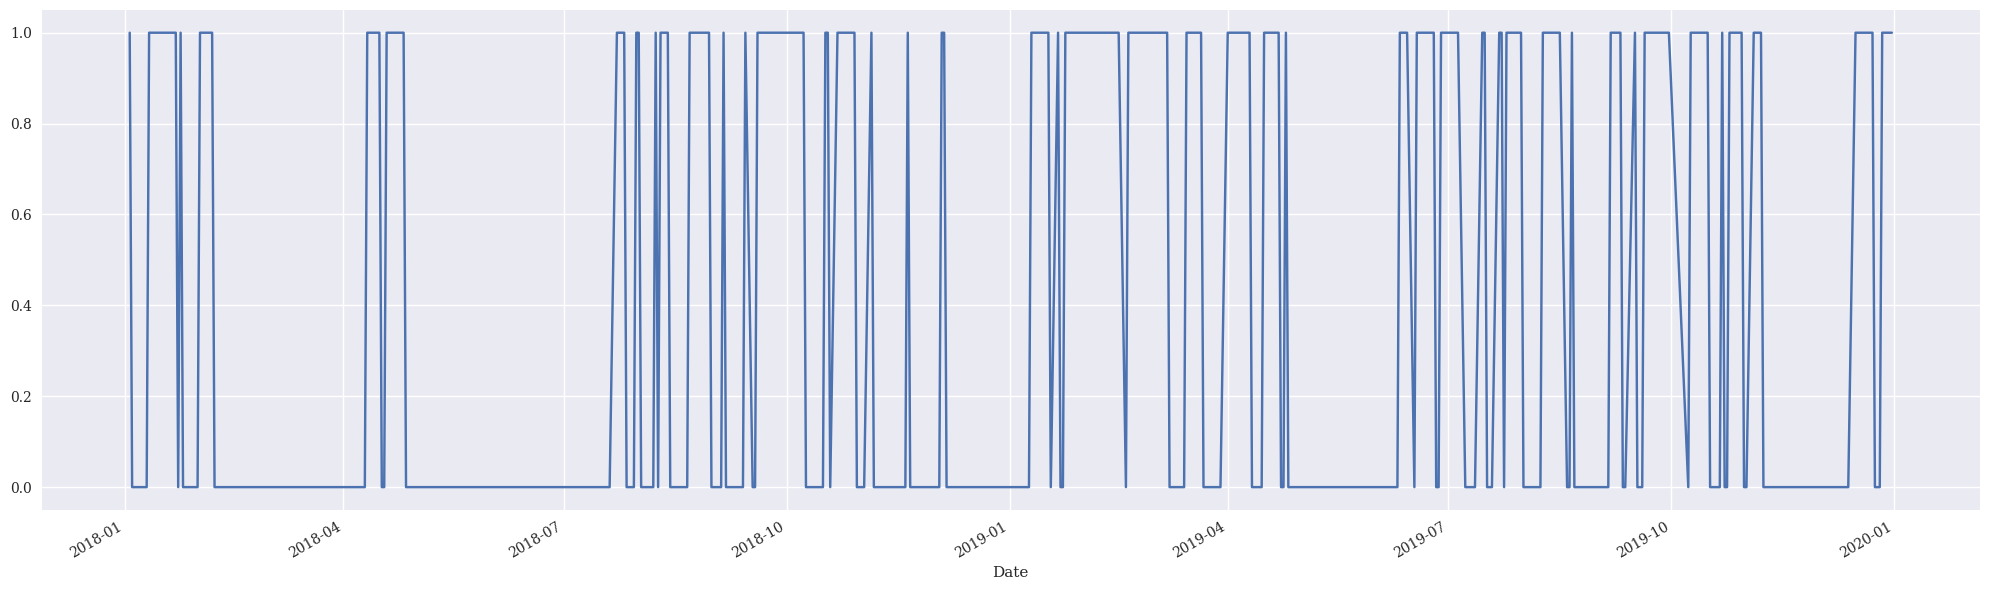

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
position2 = getposition2(data_000001[["Close", "MA_20", "MA_5"]]["2018":])
position2.plot(ax=ax)
FiguresIO.saveFigures("position2", fig_folder)
plt.show()

save figure pnl2...


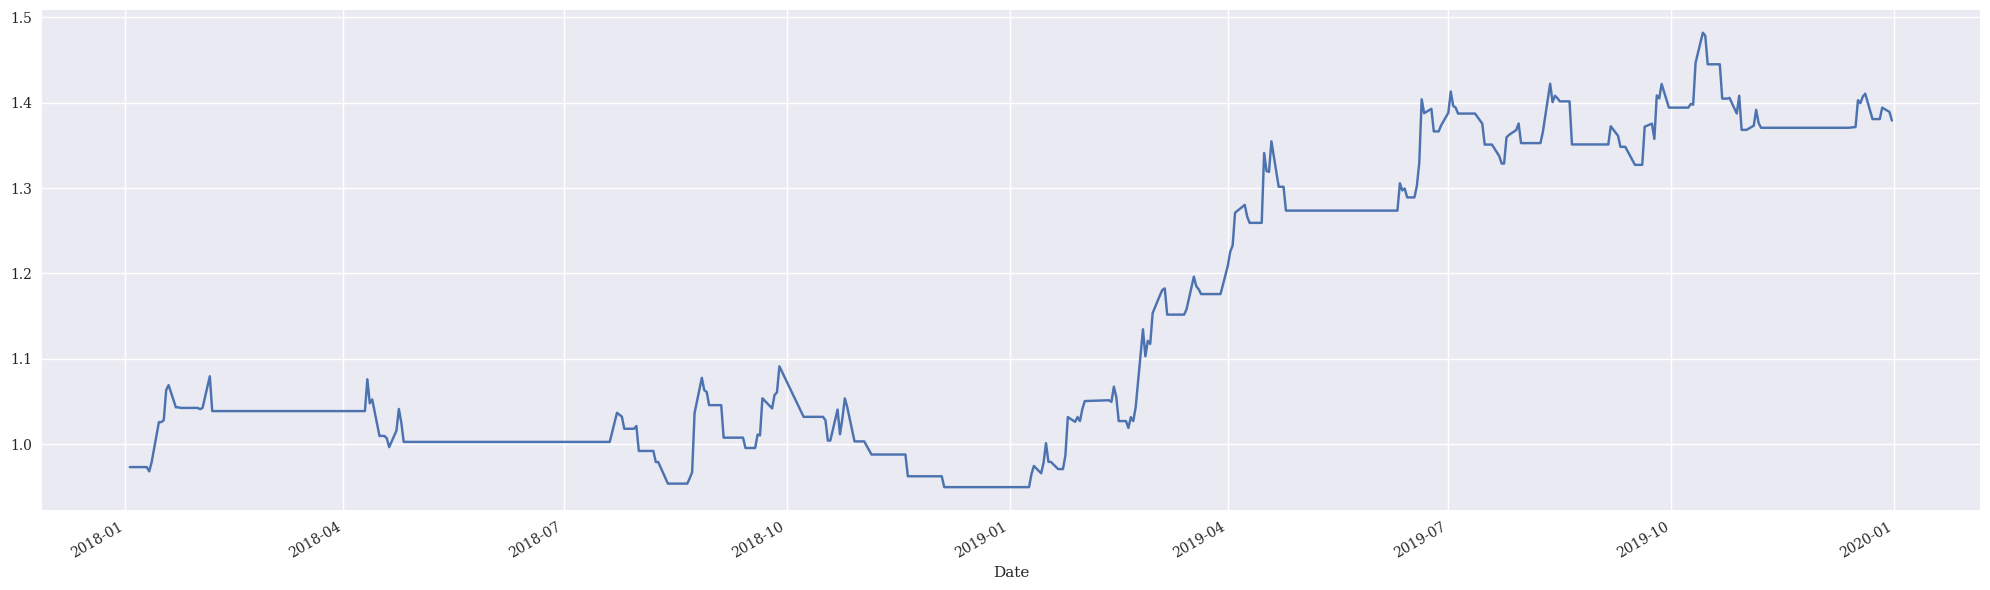

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
pnl2 = getpnl(position2, data_000001[["Close", "MA_20", "MA_5"]]["2018":])
pnl2.plot(ax=ax)
FiguresIO.saveFigures("pnl2", fig_folder)
plt.show()

In [22]:
pnl2.pct_change().mean() / pnl2.pct_change().std() * np.sqrt(264)

0.9951775197641668

In [23]:
(position2.diff() > 0).sum()

43

save figure Drawdown2...


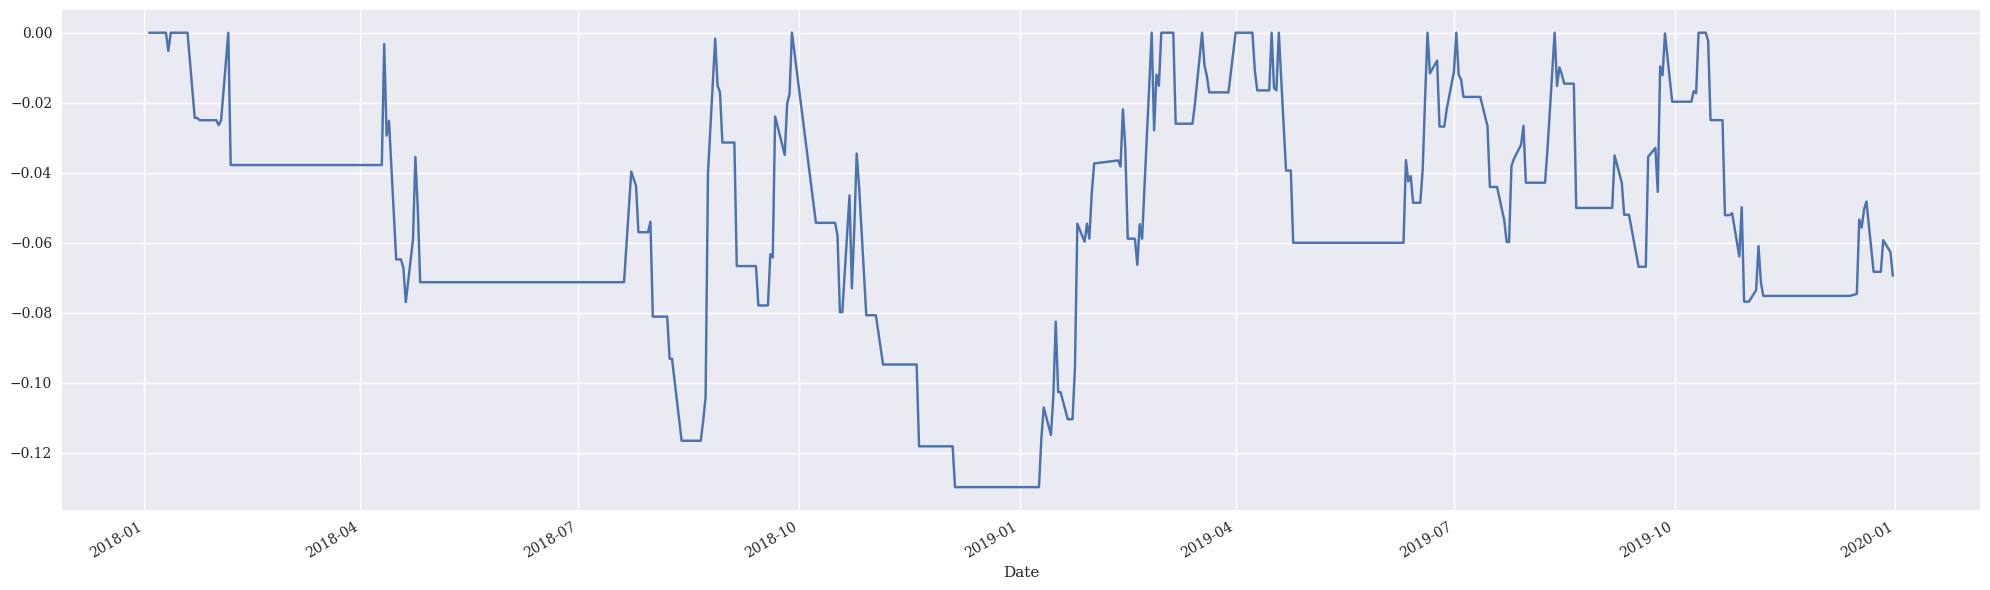

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6), dpi=100)
rollmax = pnl2.rolling(len(pnl2), min_periods=1).max()
drawdown = (pnl2 - rollmax) / rollmax
drawdown.plot(ax=ax)
FiguresIO.saveFigures("Drawdown2", fig_folder)
plt.show()  

# More Technical Indicators

### Bollinger Band

In [25]:
def BBANDS(df: pd.DataFrame, n: int=20) -> pd.DataFrame:
    df['MA'] = df['Close'].rolling(n).mean()
    std_n = df['Close'].rolling(n).std() 

    df['Upper_BBands'] = df['MA'] + (std_n * 2)
    df['Lower_BBands'] = df['MA'] - (std_n * 2)
    return df

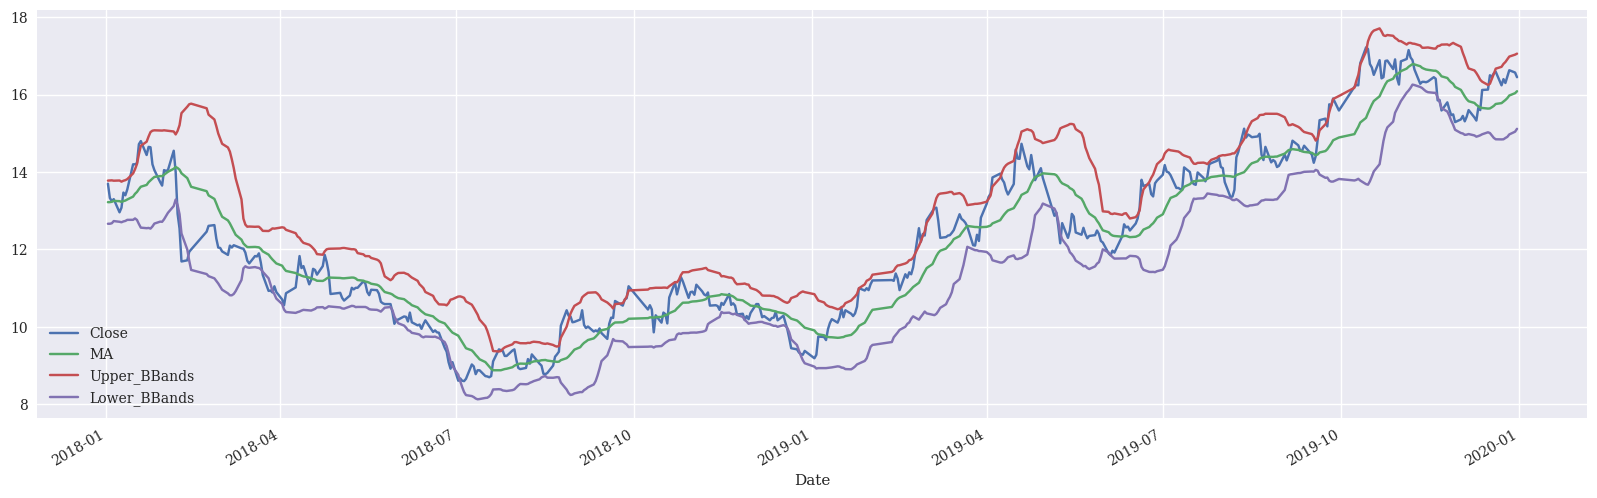

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6), dpi=100)
df = BBANDS(data_000001)
df[["Close", "MA", "Upper_BBands", "Lower_BBands"]]["2018":].plot(ax=ax)
plt.show()

# A Bollinger Band Strategy

Buy: 
1. when open < MA_20 and close > MA
2. when volumn is highest among recent 10 days

Sell:
1. when close < MA_5

In [27]:
def getposition3(df: pd.DataFrame) -> tuple[pd.Series, list, list]:

    """
    一个交易策略
    """

    vol_rolling_max = df["Vol"].rolling(10).max()
    MA_5 = df["Close"].rolling(5).mean()
    MA = df["Close"].rolling(20).mean()
    position = pd.Series(0, index = df.index)
    buypoints = []
    sellpoints = []
    posi = 0
    for index, row in df.iterrows():
        if posi == 1:
            position[index] = 1
        if row['Open'] < MA[index] and row['Close'] > MA[index] and \
            vol_rolling_max[index] <= row['Vol']:
            if posi == 0:
                posi = 1
                buypoints.append((index, row['Close']))
        if row['Close'] < MA_5[index]:
            if posi == 1:
                posi = 0
                sellpoints.append((index, row['Close']))
    return position, buypoints, sellpoints

In [28]:
position3, buypoints, sellpoints = getposition3(df[["Close", "MA", "Vol", "Open"]]["2018":])

save figure A Bollinger Band Strategy...


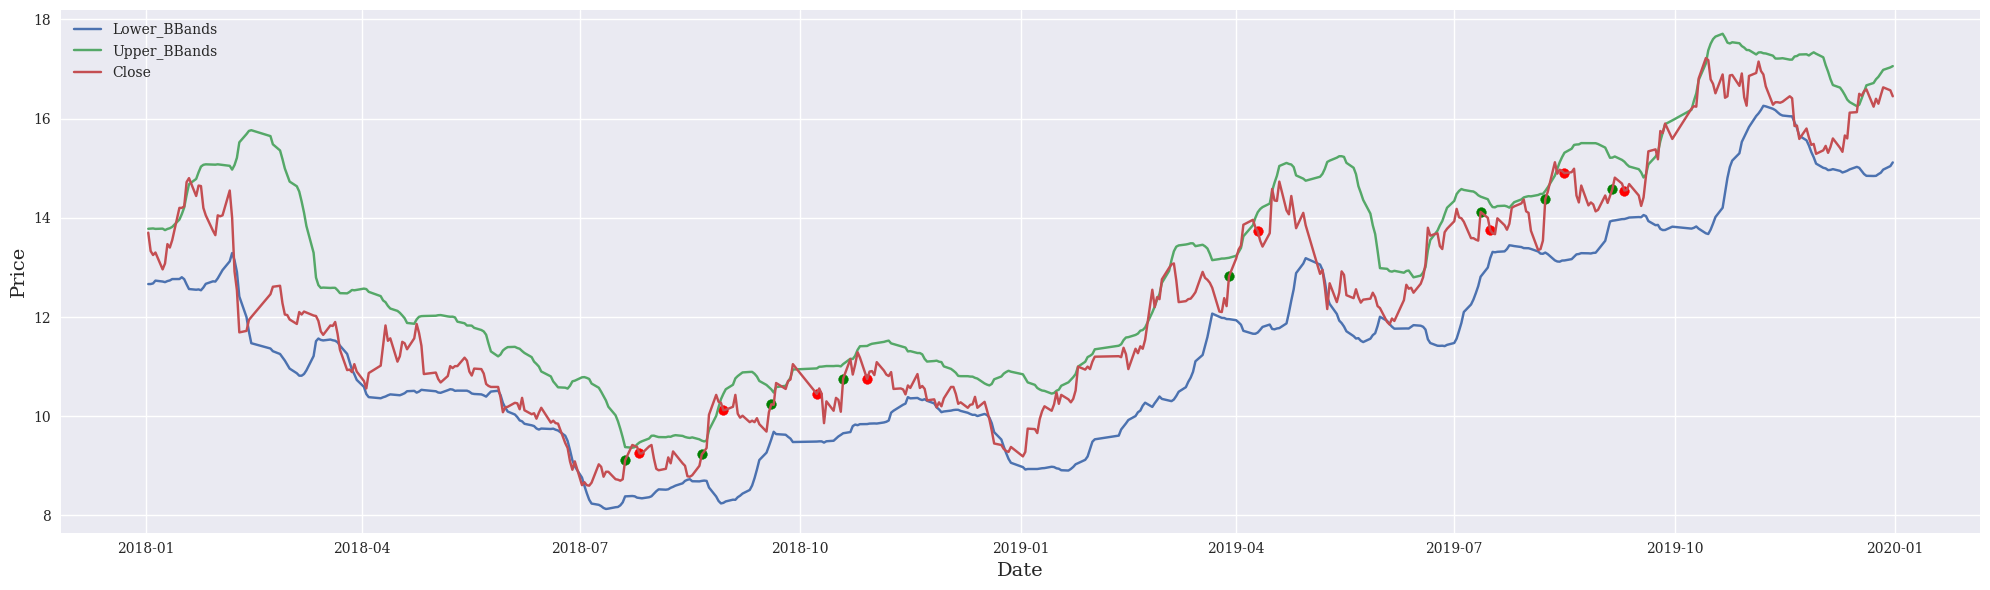

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6), dpi=100)
ax.plot(df["Lower_BBands"]["2018":], label="Lower_BBands")
ax.plot(df["Upper_BBands"]["2018":], label="Upper_BBands")
ax.plot(df["Close"]["2018":], label="Close")
ax.scatter(list(zip(*buypoints))[0], list(zip(*buypoints))[1], c="g")
ax.scatter(list(zip(*sellpoints))[0], list(zip(*sellpoints))[1], c="r")
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Price", fontsize=14)
ax.legend(loc="best")
FiguresIO.saveFigures("A Bollinger Band Strategy", fig_folder)
plt.show()

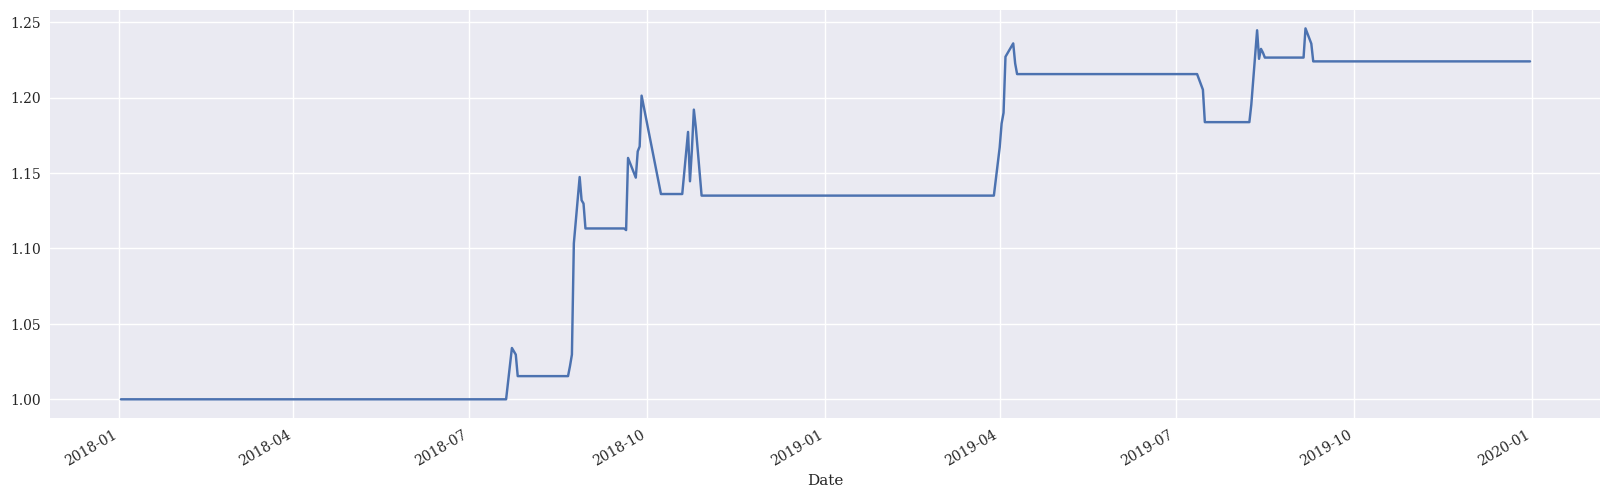

Sharpe Ratio:  1.016456493394954
Turnover Number:  8


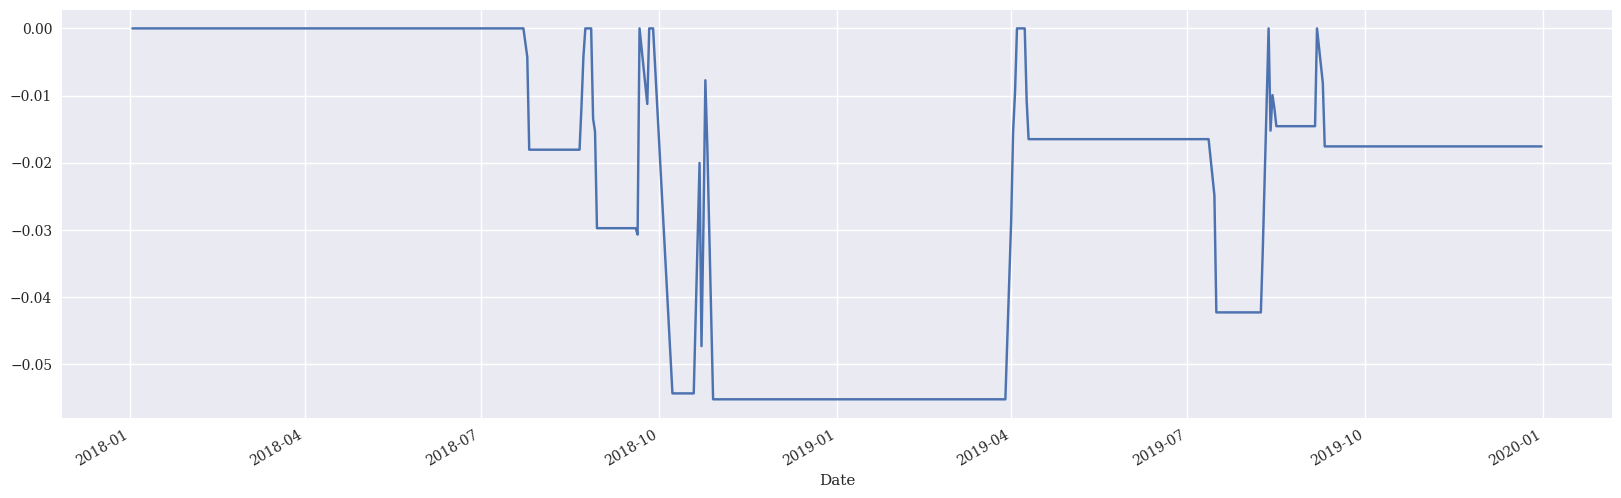

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
pnl3 = getpnl(position3, df)
pnl3.plot(ax=ax)
plt.show()

print(
    "Sharpe Ratio: ",
    pnl3.pct_change().mean() / pnl3.pct_change().std() * np.sqrt(264)
)
print("Turnover Number: ", (position3.diff() > 0).sum())

fig, ax = plt.subplots(1, 1, figsize=(20, 6))
rollmax = pnl3.rolling(len(pnl3), min_periods=1).max()
drawdown = (pnl3 - rollmax) / rollmax
drawdown.plot(ax=ax)
plt.show()

# In class exercise

Implement the following trading strategy and test it.

Buy: 
1. when open < MA_20 and close > MA

Sell:
1. when close > Upper_BBands

In [32]:
def getposition4(df: pd.DataFrame) -> tuple[pd.Series, list, list]:

    """
    一个交易策略
    """

    MA_5 = df["Close"].rolling(5).mean()
    MA = df["Close"].rolling(20).mean()
    Upper_BBands = df["Upper_BBands"]
    position = pd.Series(0, index = df.index)
    buypoints = []
    sellpoints = []
    posi = 0
    for index, row in df.iterrows():
        if posi == 1:
            position[index] = 1
        if row['Open'] < MA[index] and row['Close'] > MA[index]:
            if posi == 0:
                posi = 1
                buypoints.append((index, row['Close']))
        if row['Close'] > Upper_BBands[index]:
            if posi == 1:
                posi = 0
                sellpoints.append((index, row['Close']))
    return position, buypoints, sellpoints

position4, buypoints4, sellpoints4 = getposition4(
    df[["Close", "MA", "Vol", "Open", "Upper_BBands"]]["2018":]
)

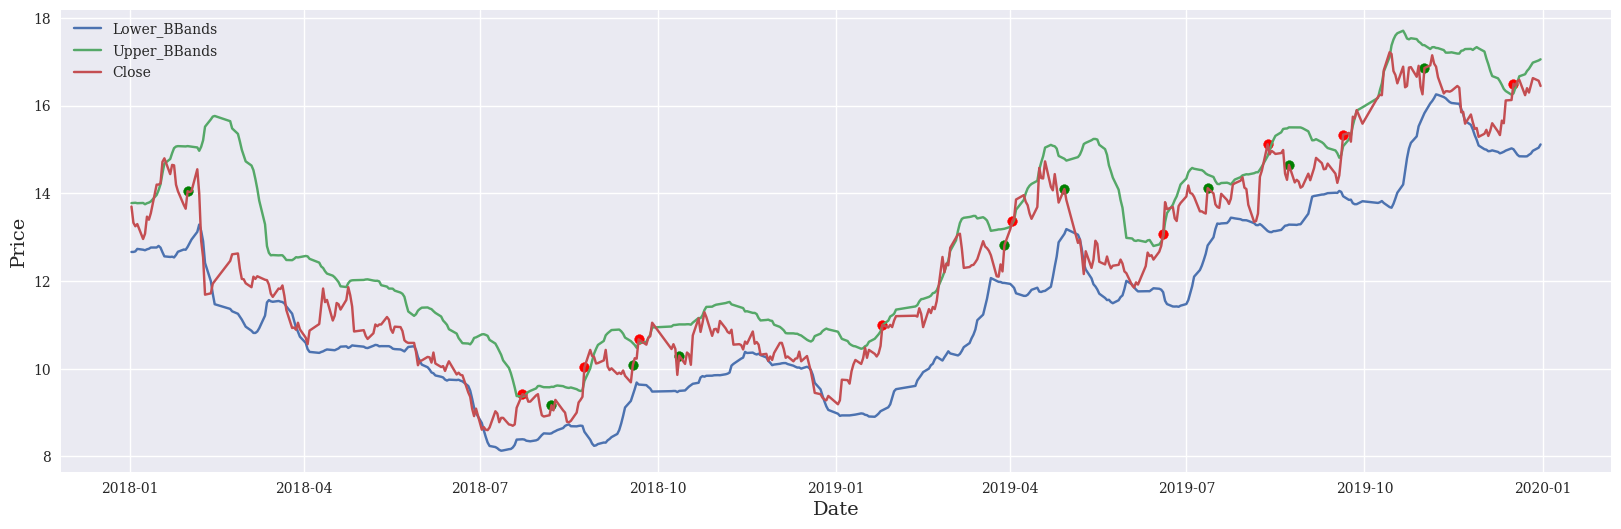

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6), dpi=100)
ax.plot(df["Lower_BBands"]["2018":], label="Lower_BBands")
ax.plot(df["Upper_BBands"]["2018":], label="Upper_BBands")
ax.plot(df["Close"]["2018":], label="Close")
ax.scatter(list(zip(*buypoints4))[0], list(zip(*buypoints4))[1], c="g")
ax.scatter(list(zip(*sellpoints4))[0], list(zip(*sellpoints4))[1], c="r")
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Price", fontsize=14)
ax.legend(loc="best")
plt.show()

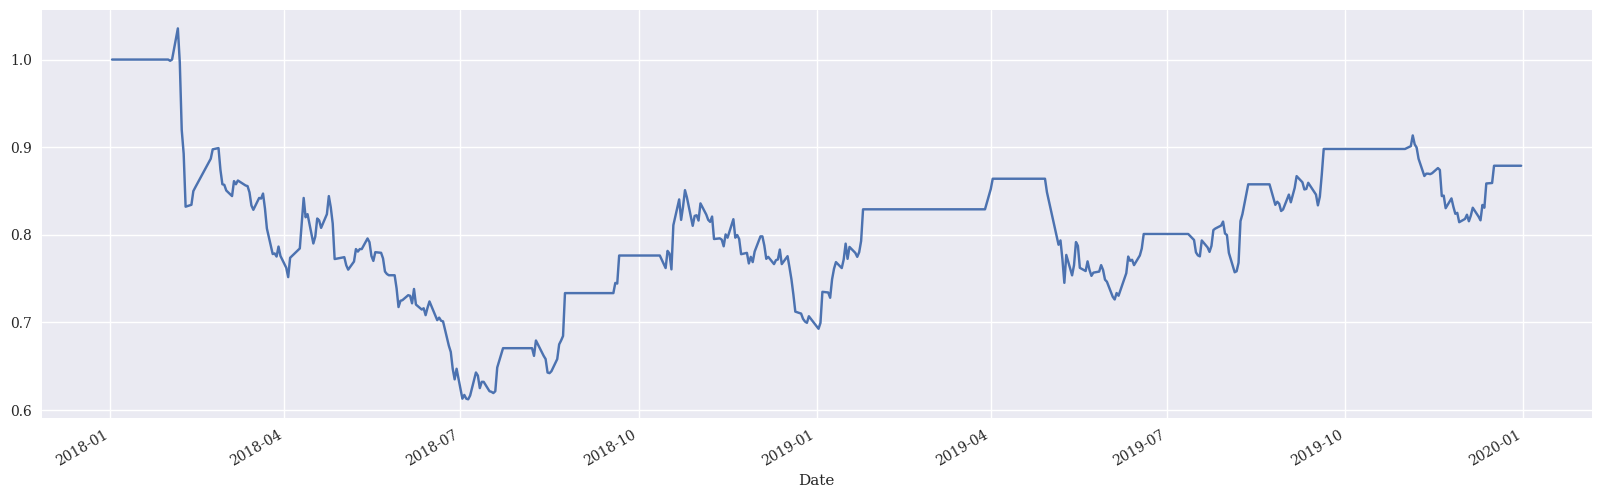

Sharpe Ratio:  -0.1357517621603182
Turnover Number:  9


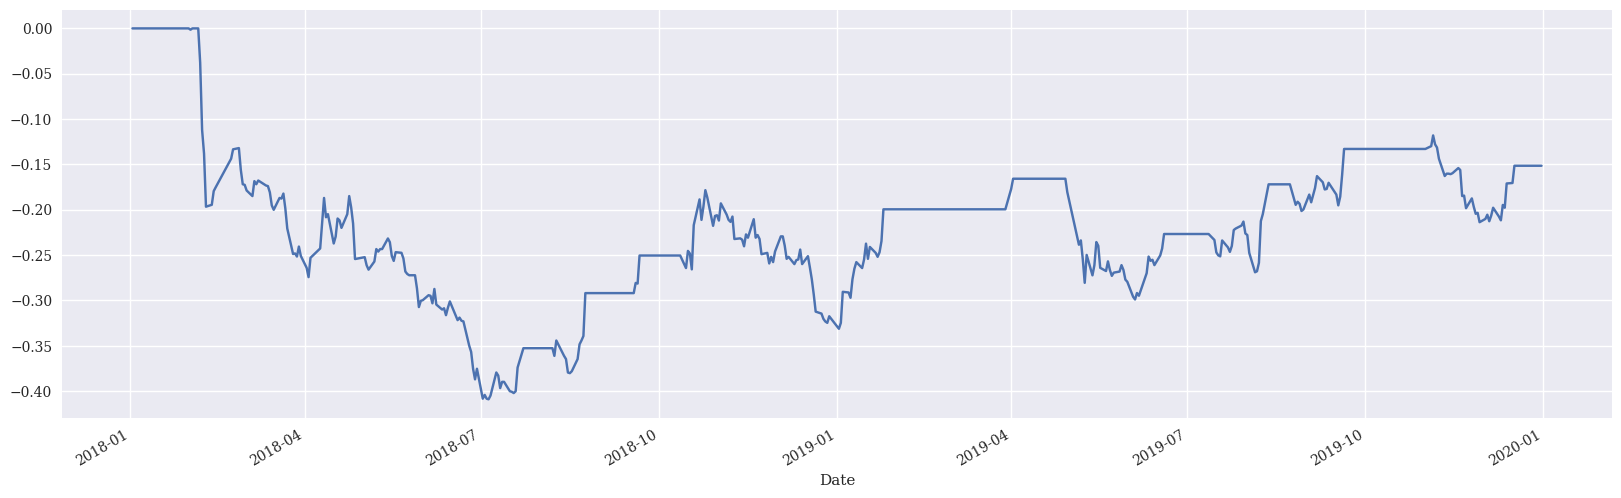

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
pnl4 = getpnl(position4, df)
pnl4.plot(ax=ax)
plt.show()

print(
    "Sharpe Ratio: ",
    pnl4.pct_change().mean() / pnl4.pct_change().std() * np.sqrt(264)
)
print("Turnover Number: ", (position4.diff() > 0).sum())

fig, ax = plt.subplots(1, 1, figsize=(20, 6))
rollmax = pnl4.rolling(len(pnl4), min_periods=1).max()
drawdown = (pnl4 - rollmax) / rollmax
drawdown.plot(ax=ax)
plt.show()